<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/2023_12_3_401_Ultralystics_YOLO_v8_Inference_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultralytics YOLO_v8 Inference

# GPU 정보 확인

In [ ]:
!nvidia-smi

Wed Nov 29 05:30:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. Install YOLO_v8 Package

https://github.com/ultralytics/ultralytics

> ## 1) pip Method

In [ ]:
# YOLO 패키지 설치
!pip install -q ultralytics==8.0.20

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


> ## 2) Git clone Method (for development)

In [ ]:
# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

# II. Image Detection

### 💻 CLI

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

>## 1) Inference 수행

* model = yolov8s.pt

In [ ]:
!yolo task = detect \
      mode = predict \
      model = yolov8s.pt \
      conf = 0.25 \
      source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg' \
      save = True

100% 21.5M/21.5M [00:00<00:00, 269MB/s]

2023-11-29 05:31:04.544945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 05:31:04.545003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 05:31:04.545048: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 05:31:06.599808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
100% 104k/104k [00:00<00:00

> ## 2) Inference 결과

* runs/detect/predict/*

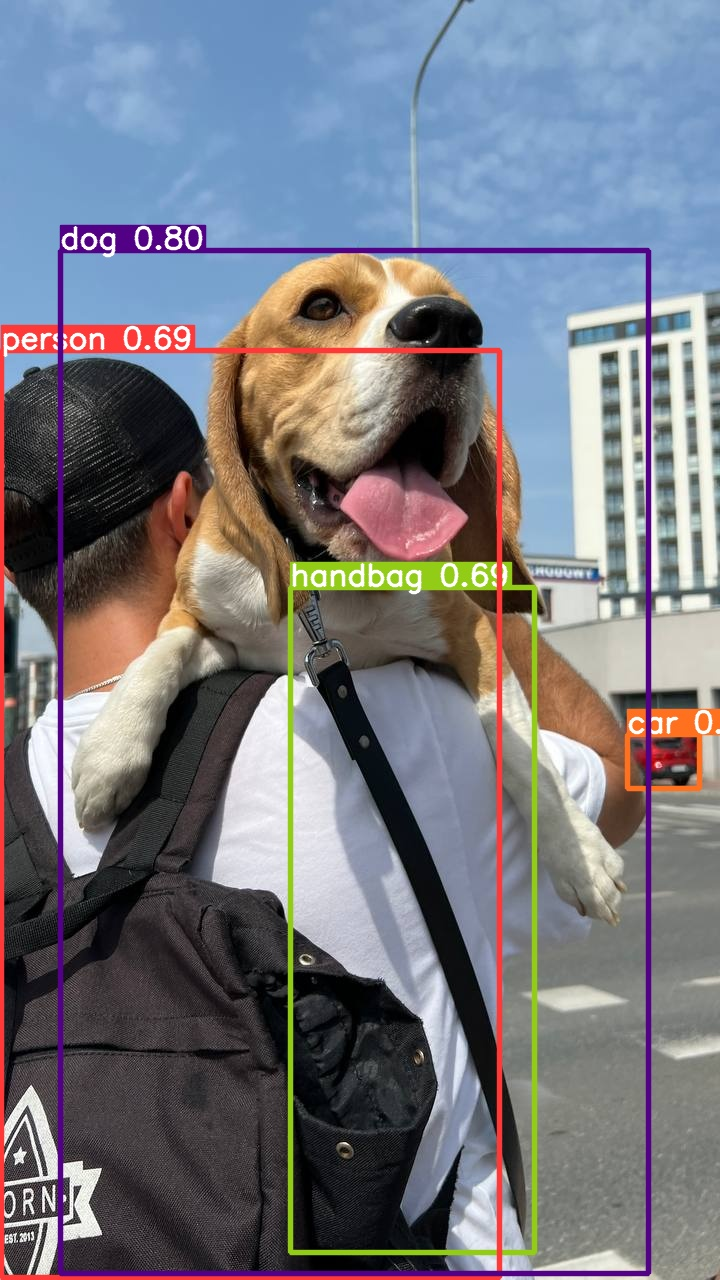

In [ ]:
from IPython.display import Image

Image(filename = '/content/runs/detect/predict/dog.jpeg',
      height = 600)

# III. Segmentation

>## 1) Inference 수행

* model = yolov8s-seg.pt

In [ ]:
!yolo task = segment \
      mode = predict \
      model = yolov8s-seg.pt \
      conf = 0.25 \
      source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg' \
      save = True

100% 22.8M/22.8M [00:00<00:00, 72.9MB/s]

2023-11-29 05:31:21.959677: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 05:31:21.959737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 05:31:21.959769: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 05:31:23.478539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
Found https://media.ro

> ## 2) Inference 결과

* runs/detect/segment/*

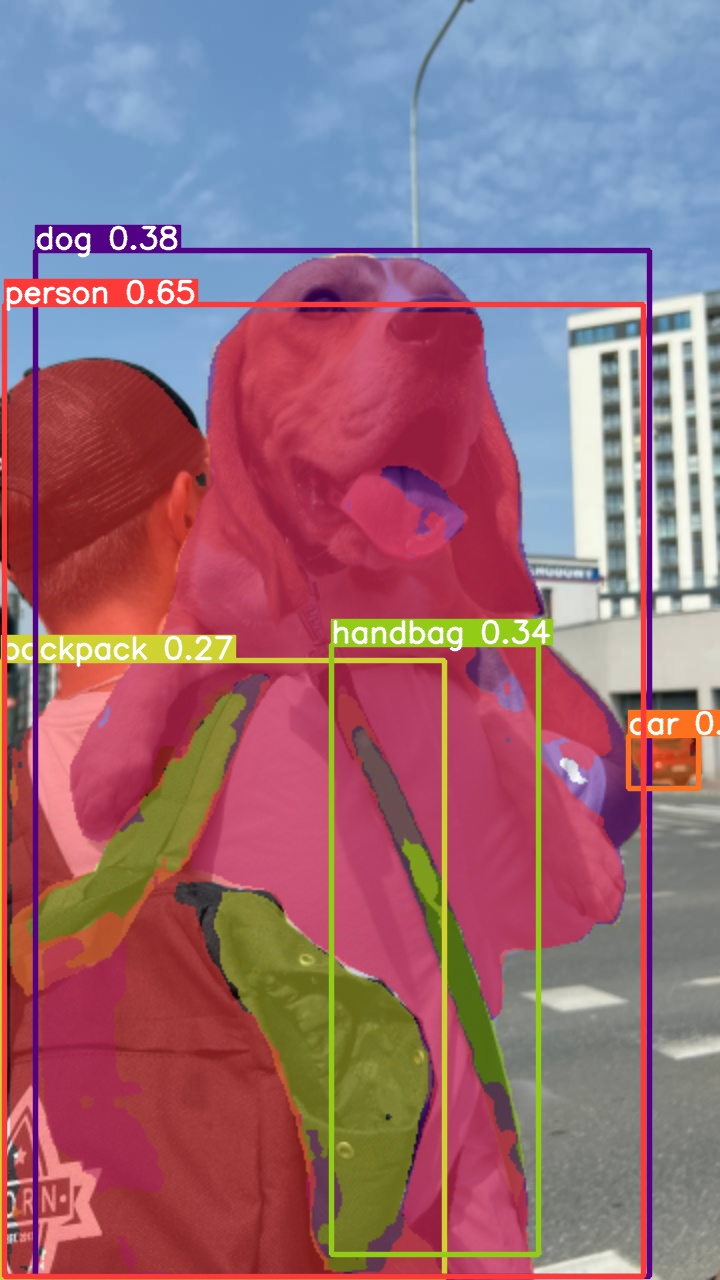

In [ ]:
from IPython.display import Image

Image(filename = '/content/runs/segment/predict/dog.jpeg',
      height = 600)

# IV. 🐍 Python SDK

* The simplest way of simply using YOLO_v8 directly in a Python environment.

> ## 1) Import YOLO Package

In [ ]:
from ultralytics import YOLO

> ## 2) Load Model

In [ ]:
# 모델 로딩할때 이렇게 하면 됨
model = YOLO('/content/yolov8s.pt')

results = model.predict(source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg',
                        conf = 0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


> ## 3) Boubding Box Regression

In [ ]:
# 바운딩 박스 좌표
results[0].boxes.xyxy

tensor([[6.00000e+01, 2.50000e+02, 6.48000e+02, 1.27300e+03],
        [1.00000e+00, 3.50000e+02, 4.99000e+02, 1.27700e+03],
        [2.90000e+02, 5.87000e+02, 5.34000e+02, 1.25200e+03],
        [6.27000e+02, 7.34000e+02, 6.99000e+02, 7.88000e+02]], device='cuda:0')

> ## 4) Confidence Score

In [ ]:
results[0].boxes.conf

tensor([0.79679, 0.69055, 0.68980, 0.44159], device='cuda:0')

> ## 5) Class Classification

In [ ]:
# CLASS 정보
results[0].boxes.cls

tensor([16.,  0., 26.,  2.], device='cuda:0')

# V. Video Detection

>## 1) Video File Download

* matrix.mp4 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4

--2023-11-29 05:31:47--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/Matrix2.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17873420 (17M) [application/octet-stream]
Saving to: ‘Matrix2.mp4’

Matrix2.mp4         100%[===================>]  17.04M  --.-KB/s    in 0.06s   

2023-11-29 05:31:47 (274 MB/s) - ‘Matrix2.mp4’ saved [17873420/17873420]



>## 2) Video Detection 수행

* 약 3분

In [ ]:
%%time

!yolo task = detect \
      mode = predict \
      model = yolov8s.pt \
      conf = 0.25 \
      source = '/content/Matrix2.mp4' \
      save = True

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (3265/8260) /content/Matrix2.mp4: 384x640 2 persons, 7.6ms
video 1/1 (3266/8260) /content/Matrix2.mp4: 384x640 1 person, 5.8ms
video 1/1 (3267/8260) /content/Matrix2.mp4: 384x640 1 person, 5.8ms
video 1/1 (3268/8260) /content/Matrix2.mp4: 384x640 1 person, 5.7ms
video 1/1 (3269/8260) /content/Matrix2.mp4: 384x640 1 person, 5.9ms
video 1/1 (3270/8260) /content/Matrix2.mp4: 384x640 1 person, 5.7ms
video 1/1 (3271/8260) /content/Matrix2.mp4: 384x640 1 person, 5.8ms
video 1/1 (3272/8260) /content/Matrix2.mp4: 384x640 2 persons, 5.8ms
video 1/1 (3273/8260) /content/Matrix2.mp4: 384x640 1 person, 6.5ms
video 1/1 (3274/8260) /content/Matrix2.mp4: 384x640 1 person, 5.9ms
video 1/1 (3275/8260) /content/Matrix2.mp4: 384x640 2 persons, 5.8ms
video 1/1 (3276/8260) /content/Matrix2.mp4: 384x640 2 persons, 5.9ms
video 1/1 (3277/8260) /content/Matrix2.mp4: 384x640 2 persons, 5.8ms
video 1/1 (3278/8260) /content/Matrix2.mp4: 384x640 2 persons, 9.9ms
video 

>## 3) Video Segmentation 수행

* 약 2분
 - <font color = 'red'>OutOfMemoryError

In [ ]:
%%time

!yolo task = segment \
      mode = predict \
      model = yolov8s-seg.pt \
      conf = 0.25 \
      source = '/content/Matrix2.mp4' \
      save = True

2023-11-29 05:34:26.605893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 05:34:26.605949: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 05:34:26.605985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 05:34:27.658685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
video 1/1 (1/8260) /content/Matrix2.mp4: 384x640 2 persons, 2 ca

#
#
#
# The End
#
#
#